#선형회귀 분석  
###신발크기로 키 예측

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


데이터 로드

In [124]:
height = [155.3,157.5,156.5,163.9,169.3,170.5,195.5,175.1,173.8,177.7,182.6,180.7,186.7,189.9,189.2]
foot_size = [220,230,235,240,245,250,255,260,265,270,275,280,285,290,300]

In [125]:
#X, Y 데이터 생성
X = pd.DataFrame(foot_size, columns=['foot_size'])
Y = pd.Series(height)
X.head()

,foot_size
0,220
1,230
2,235
3,240
4,245


산점도 그래프 그려보기

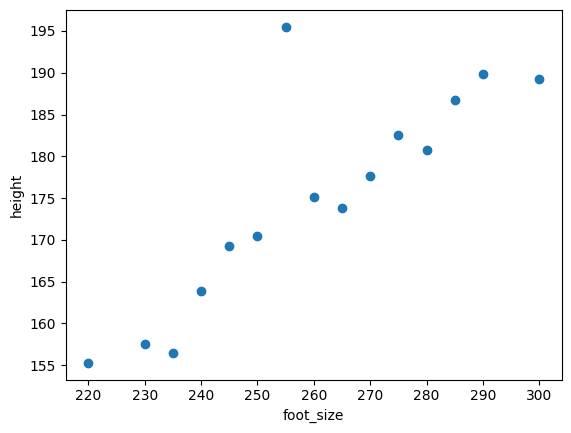

In [126]:
plt.scatter(foot_size, height)
plt.xlabel('foot_size')
plt.ylabel('height')
plt.show()

이상치 제거 : boolean indexing  


```
X['foot_size'] !=255
```



In [127]:
X['foot_size'] !=255

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
Name: foot_size, dtype: bool

In [128]:
Y= Y[X['foot_size'] !=255]
X= X[X['foot_size'] !=255]

In [129]:
print(X.head(10))
print(Y.head(10))

    foot_size
0         220
1         230
2         235
3         240
4         245
5         250
7         260
8         265
9         270
10        275
0     155.3
1     157.5
2     156.5
3     163.9
4     169.3
5     170.5
7     175.1
8     173.8
9     177.7
10    182.6
dtype: float64


In [130]:
#X.drop(6, axis=0, inplace=True)
#Y.drop(6, inplace=True)

In [131]:
X

,foot_size
0,220
1,230
2,235
3,240
4,245
5,250
7,260
8,265
9,270
10,275


훈련 데이터와 테스트 데이터 분할

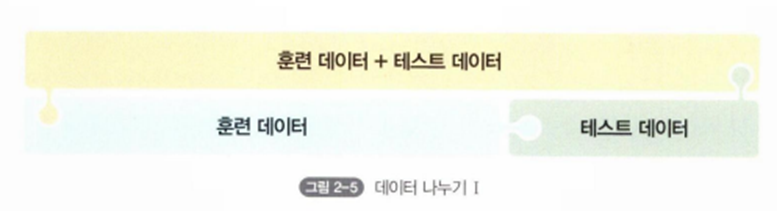

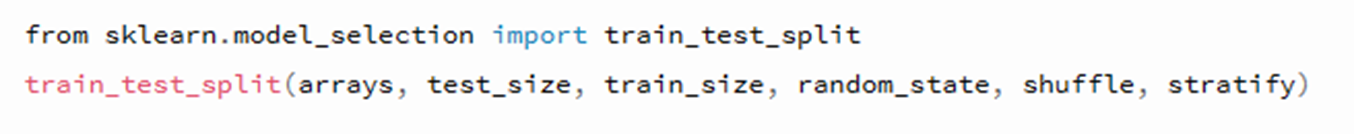
```
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
```



매개변수
- arrays : 분할시킬 데이터  
test_size : 테스트 데이터셋의 비율 (default:0.25)  
- random_state : 데이터 분할시 데이터가 섞이는데 이를위한 seed 값  
- shuffle : 셔플여부 (default: True)  
- stratify : 지정한 데이터의 비율을 유지. 타깃으로 설정하면 타깃의 비율로 데이터가 분할  

반환값
- X_train, X_test, Y_train, Y_test : 레이블을 입력한 경우  
- X_train, X_test : 레이블 없이 입력한 경우

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

분할된 데이터 출력

```
print('1. 전 처리한 X 데이터: \n {}'.format(X_train))
print('전 처리한 X 데이터 shape: {}\n'.format(X_train.shape))

print('2. 전 처리한 Y 데이터: \n {}'.format(Y_train))
print('전 처리한 Y 데이터 shape: \n\n{}'.format(Y_train.shape))
```



In [133]:
print('1. 전 처리한 X 데이터: \n {}'.format(X_train))
print('전 처리한 X 데이터 shape: {}\n'.format(X_train.shape))

print('2. 전 처리한 Y 데이터: \n {}'.format(Y_train))
print('전 처리한 Y 데이터 shape: \n\n{}'.format(Y_train.shape))

1. 전 처리한 X 데이터: 
     foot_size
13        290
5         250
9         270
2         235
1         230
14        300
4         245
8         265
11        280
3         240
7         260
전 처리한 X 데이터 shape: (11, 1)

2. 전 처리한 Y 데이터: 
 13    189.9
5     170.5
9     177.7
2     156.5
1     157.5
14    189.2
4     169.3
8     173.8
11    180.7
3     163.9
7     175.1
dtype: float64
전 처리한 Y 데이터 shape: 

(11,)


모델 학습 : LinearRegression  
- fit() 함수 : 훈련데이터를 가지고 학습시키는 함수. 모델에따라 학습방법이 다르고 단순선형회귀에서는 최소제곱법에의해 수식 y=ax+b에서 가장 적절한 a와 b를 찾아줌

In [134]:
# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train,Y_train)

LinearRegression()

학습한 결과 시각화  

- model.intercept_ : 절편
- model.coef_ : 기울기.계수.가중치 (ndarray)
```
plt.scatter(X, Y) #X,Y데이터를 점으로 출력
# plot 선 긋는 함수 c='r' 빨강색
plt.plot([0, 310], [lrmodel.intercept_, 310 * lrmodel.coef_[0] + lrmodel.intercept_], c='r')
plt.xlim(200,310)
plt.ylim(150, 200)
plt.title('Training Result')
plt.show()
```



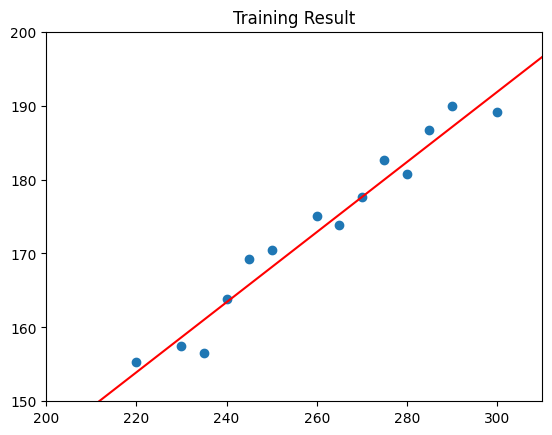

In [135]:
plt.scatter(X, Y) #X,Y데이터를 점으로 출력
# plot 선 긋는 함수 c='r' 빨강색
plt.plot([0, 310], [model.intercept_ , 310 * model.coef_[0] + model.intercept_], c='r')
plt.xlim(200,310)
plt.ylim(150, 200)
plt.title('Training Result')
plt.show()

예측 및 성능평가


```
print(model.score(X_train, Y_train))
print(r2_score(Y_test, Y_pred))
print(model.score(X_test, Y_test))
```



In [136]:
Y_pred = model.predict(X_test)
print(Y_pred)
print(list(Y_test))

[179.99517241 184.73560345 153.92280172]
[182.6, 186.7, 155.3]


In [137]:
print(model.score(X_train, Y_train))
print(r2_score(Y_test, Y_pred))
print(model.score(X_test, Y_test))

0.9481848378458773
0.9784778743452842
0.9784778743452842


실제값과 예측값과 비교


```
Y_values = Y_test.values

for i in range(len(Y_test)):
    print("실제 신장(키) : {:.3f}, 학습후 예측 신장(키) : {:.3f}".format(Y_values[i], Y_pred[i]))
```



In [138]:
Y_values = Y_test.values

for i in range(len(Y_test)):
    print("실제 신장(키) : {:.3f}, 학습후 예측 신장(키) : {:.3f}".format(Y_values[i], Y_pred[i]))

실제 신장(키) : 182.600, 학습후 예측 신장(키) : 179.995
실제 신장(키) : 186.700, 학습후 예측 신장(키) : 184.736
실제 신장(키) : 155.300, 학습후 예측 신장(키) : 153.923


나의 신발크기로 키 예측해 보기


```
my = model.predict(pd.DataFrame([230], columns=['foot_size']))
```



In [139]:
my = model.predict(pd.DataFrame([257], columns=['foot_size']))
print(my)

[171.46239655]


#다중회귀 분석  
###광고대비 수익률 예측

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 로드  


```
df = pd.read_csv("Advertising.csv")
```



In [141]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2학년2학기/기계학습프로그래밍/3W/Advertising.csv의 사본")
df.head()

,Unnamed: 0,FB,TV,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [142]:
df.shape

(200, 5)

데이터 전처리


```
df.drop(columns=['Unnamed: 0'], inplace=True)
```



In [143]:
# unnamed: 0 컬럼 제거
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(200, 4)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FB         200 non-null    float64
 1   TV         200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [145]:
df.describe()

,FB,TV,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


데이터 시각화


```
sns.pairplot(df, x_vars=['FB','TV','Newspaper'], y_vars='Sales', kind='reg')
```



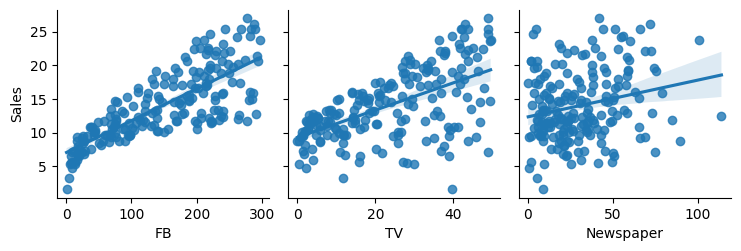

In [146]:
sns.pairplot(df, x_vars=['FB', 'TV', 'Newspaper'], y_vars='Sales', kind='reg')
plt.show()

데이터 분할


```
X = df.drop(columns=['Sales'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
```



In [147]:
X = df.drop(columns = ['Sales'])
Y = df['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [148]:
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())

        FB    TV  Newspaper
79   116.0   7.7       23.1
197  177.0   9.3        6.4
38    43.1  26.7       35.1
24    62.3  12.6       18.3
122  224.0   2.4       15.6
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: Sales, dtype: float64
        FB    TV  Newspaper
95   163.3  31.6       52.9
15   195.4  47.7       52.9
30   292.9  28.3       43.2
158   11.7  36.9       45.2
128  220.3  49.0        3.2
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


모델 학습

In [149]:
model1=LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

예측 및 성능테스트

In [150]:
Y_pred = model1.predict(X_test)

In [151]:
print(model1.score(X_train, Y_train))
print(r2_score(Y_test, Y_pred))
print(model1.score(X_test, Y_test))

0.8957008271017818
0.899438024100912
0.899438024100912


In [152]:
print(model1.intercept_) #
print(model1.coef_[0:]) #
print(model1.coef_[1]) #


2.979067338122629
[0.04472952 0.18919505 0.00276111]
0.18919505423437652


In [153]:
print(Y_pred)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


실제값과 예측값과의 비교

In [154]:
Y_values = Y_test.values

for i in range(10):
    print("실제 매출 : {:.3f}, 학습후 예측 매출 : {:.3f}".format(Y_values[i], Y_pred[i]))

실제 매출 : 16.900, 학습후 예측 매출 : 16.408
실제 매출 : 22.400, 학습후 예측 매출 : 20.890
실제 매출 : 21.400, 학습후 예측 매출 : 21.554
실제 매출 : 7.300, 학습후 예측 매출 : 10.609
실제 매출 : 24.700, 학습후 예측 매출 : 22.112
실제 매출 : 12.600, 학습후 예측 매출 : 13.106
실제 매출 : 22.300, 학습후 예측 매출 : 21.057
실제 매출 : 8.400, 학습후 예측 매출 : 7.461
실제 매출 : 11.500, 학습후 예측 매출 : 13.606
실제 매출 : 14.900, 학습후 예측 매출 : 15.155


새로운 데이터로 예측

In [155]:
df1 = pd.DataFrame(np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]]), columns=['FB', 'TV', 'Newspaper'])
print(df1)


   FB  TV  Newspaper
0   0   0          0
1   1   0          0
2   0   1          0
3   0   0          1
4   1   1          1


In [156]:
pred_df1 = model1.predict(df1)
pred_df1

array([2.97906734, 3.02379686, 3.16826239, 2.98182845, 3.21575302])

#다항 회귀 : 특성공학

PolynomialFeatures를 사용하여 특성을 확장


```
poly = PolynomialFeatures(include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)
```



In [157]:
from sklearn.preprocessing import PolynomialFeatures
# 차원 확장
poly = PolynomialFeatures(include_bias=False)
poly.fit(X_train)

PolynomialFeatures(include_bias=False)

In [158]:
X_trainp = poly.transform(X_train)
X_testp = poly.transform(X_test)

In [159]:
XP = pd.DataFrame(X_trainp)
XP.head()

,0,1,2,3,4,5,6,7,8
0,116.0,7.7,23.1,13456.00,893.20,2679.60,59.29,177.87,533.61
1,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
2,43.1,26.7,35.1,1857.61,1150.77,1512.81,712.89,937.17,1232.01
3,62.3,12.6,18.3,3881.29,784.98,1140.09,158.76,230.58,334.89
4,224.0,2.4,15.6,50176.00,537.60,3494.40,5.76,37.44,243.36


모델 학습

In [160]:
model2 = LinearRegression()
model2.fit(X_trainp, Y_train)

LinearRegression()

예측 및 성능평가

In [161]:
Y_pred = model2.predict(X_testp)
print(Y_pred[:5])
print(Y_test[:5])
Y_test.shape

[17.25443578 22.7193321  20.42799436  7.542709   24.37103037]
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


(40,)

In [162]:
print(model2.score(X_trainp, Y_train))
print(model2.score(X_testp, Y_test))

0.986104518792419
0.9869181490609605


계산된 계수, 절편 출력


```
print(model2.intercept_)
for i in range(len(model2.coef_)):
  print(model2.coef_[i])
```



In [163]:
print(model2.intercept_)
for i in range(len(model2.coef_)):
  print(model2.coef_[i])

4.939014879989273
0.05323561600679192
0.017098045114428532
0.010580744710347567
-0.00011228677947322865
0.0011112174137694957
-7.379895412388637e-05
0.00013284296214206284
0.00012489247865853954
2.7966556038882435e-05


다중회귀 vs 다항회귀
다중회귀는 특성 곱이 X
다항회귀는 특성 곱이 적용
